# **Movies Recommendation System**

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

# **1. Necessary Libraries to be imported**

In [ ]:
%%R
install.packages('recommenderlab', repos='http://cran.rstudio.com/')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Rcpp’, ‘float’, ‘RcppProgress’, ‘arules’, ‘proxy’, ‘registry’, ‘irlba’, ‘recosystem’, ‘matrixStats’


R[write to console]: trying URL 'http://cran.rstudio.com/src/contrib/Rcpp_1.0.8.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3086192 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

In [ ]:
%%R
install.packages("reshape2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401481 bytes (392 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R
install.packages('data.table')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5301817 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [ ]:
%%R
install.packages("ggplot2")

In [ ]:
%%R
library("recommenderlab") 

In [ ]:
%%R
library(ggplot2)

In [ ]:
%%R
library(data.table)

In [ ]:
%%R
library(reshape2)

In [ ]:
!pwd

# **2. Retrieving Data**

In [ ]:
import pandas as pd

df =pd.read_csv("drive/My Drive/Dataset/movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
%%R
movie_data <- read.csv("drive/My Drive/Dataset/movies.csv",stringsAsFactors=FALSE)

In [ ]:
%%R
rating_data <- read.csv("drive/My Drive/Dataset/ratings.csv")
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [ ]:
%%R
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        


In [ ]:
%%R
head(movie_data)

  movieId                              title
1       1                   Toy Story (1995)
2       2                     Jumanji (1995)
3       3            Grumpier Old Men (1995)
4       4           Waiting to Exhale (1995)
5       5 Father of the Bride Part II (1995)
6       6                        Heat (1995)
                                       genres
1 Adventure|Animation|Children|Comedy|Fantasy
2                  Adventure|Children|Fantasy
3                              Comedy|Romance
4                        Comedy|Drama|Romance
5                                      Comedy
6                       Action|Crime|Thriller


In [ ]:
%%R
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  


In [ ]:
%%R
head(rating_data)

  userId movieId rating  timestamp
1      1      16    4.0 1217897793
2      1      24    1.5 1217895807
3      1      32    4.0 1217896246
4      1      47    4.0 1217896556
5      1      50    4.0 1217896523
6      1     110    4.0 1217896150


# **3. Data Pre-processing** 

In [ ]:
%%R
movie_genre <- as.data.frame(movie_data$genres, stringsAsFactors=FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1], '[|]', 
                                   type.convert=TRUE), 
                         stringsAsFactors=FALSE) 
colnames(movie_genre2) <- c(1:10)
list_genre <- c("Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre
colnames(genre_mat1) <- list_genre
for (index in 1:nrow(movie_genre2)) {
  for (col in 1:ncol(movie_genre2)) {
    gen_col = which(genre_mat1[1,] == movie_genre2[index,col]) 
    genre_mat1[index+1,gen_col] <- 1
}
}
genre_mat2 <- as.data.frame(genre_mat1[-1,], stringsAsFactors=FALSE) #remove first row, which was the genre list
for (col in 1:ncol(genre_mat2)) {
  genre_mat2[,col] <- as.integer(genre_mat2[,col]) #convert from characters to integers
} 
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
%%R
SearchMatrix <- cbind(movie_data[,1:2], genre_mat2[])
head(SearchMatrix)


  movieId                              title Action Adventure Animation
1       1                   Toy Story (1995)      0         1         1
2       2                     Jumanji (1995)      0         1         0
3       3            Grumpier Old Men (1995)      0         0         0
4       4           Waiting to Exhale (1995)      0         0         0
5       5 Father of the Bride Part II (1995)      0         0         0
6       6                        Heat (1995)      1         0         0
  Children Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical
1        1      1     0           0     0       1         0      0       0
2        1      0     0           0     0       1         0      0       0
3        0      1     0           0     0       0         0      0       0
4        0      1     0           0     1       0         0      0       0
5        0      1     0           0     0       0         0      0       0
6        0      0     1           0     0     

In [ ]:
%%R
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)
ratingMatrix <- as.matrix(ratingMatrix[,-1]) #remove userIds
#Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class ‘realRatingMatrix’ with 105339 ratings.


In [ ]:
%%R
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

 [1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"        


In [ ]:
%%R
lapply(recommendation_model, "[[", "description")


$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF

In [ ]:
%%R
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE



# **4. Exploring & Visualisation of Movie Data**

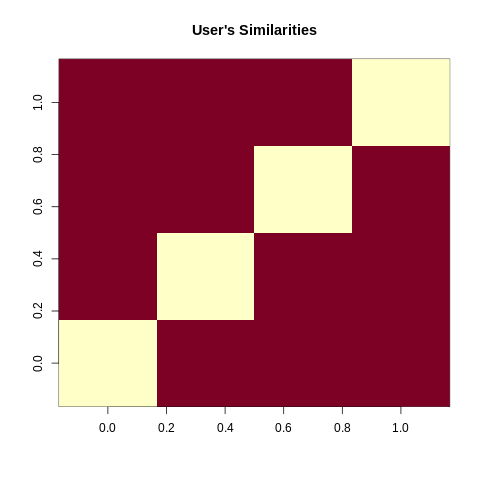

In [ ]:
%%R
similarity_mat <- similarity(ratingMatrix[1:4, ],
                               method = "cosine",
                               which = "users")
as.matrix(similarity_mat)
image(as.matrix(similarity_mat), main = "User's Similarities")

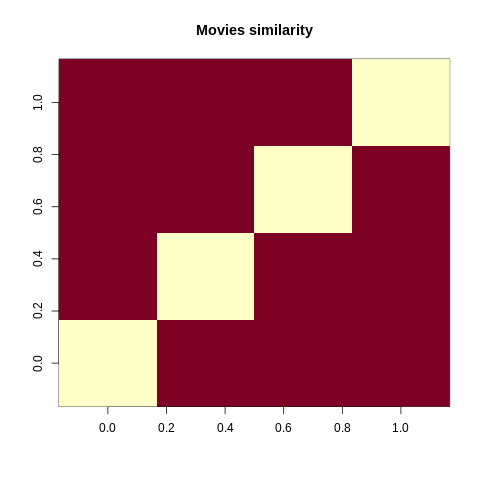

In [ ]:
%%R
movie_similarity <- similarity(ratingMatrix[, 1:4], method =
                                 "cosine", which = "items")
as.matrix(movie_similarity)
image(as.matrix(movie_similarity), main = "Movies similarity")

In [ ]:
%%R
rating_values <- as.vector(ratingMatrix@data)
unique(rating_values) # extracting unique ratings

 [1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5


In [ ]:
%%R
Table_of_Ratings <- table(rating_values) # creating a count of movie ratings
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 


In [ ]:
%%R
library(ggplot2)
movie_views <- colCounts(ratingMatrix) # count views for each movie
table_views <- data.frame(movie = names(movie_views),
                          views = movie_views) # create dataframe of views
table_views <- table_views[order(table_views$views,
                                 decreasing = TRUE), ] # sort by number of views
table_views$title <- NA
for (index in 1:10325){
  table_views[index,3] <- as.character(subset(movie_data,
                                         movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

    movie views                                     title
296   296   325                       Pulp Fiction (1994)
356   356   311                       Forrest Gump (1994)
318   318   308          Shawshank Redemption, The (1994)
480   480   294                      Jurassic Park (1993)
593   593   290          Silence of the Lambs, The (1991)
260   260   273 Star Wars: Episode IV - A New Hope (1977)


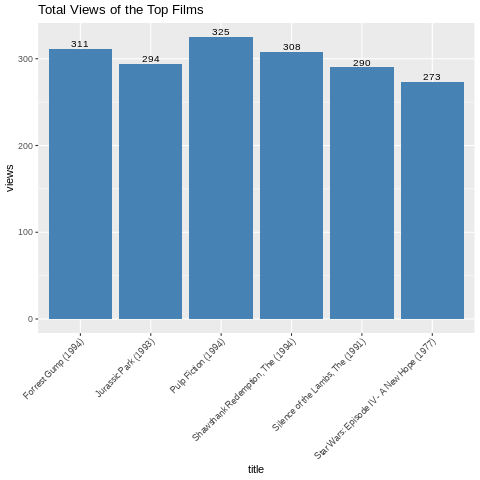

In [ ]:
%%R
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = 'steelblue') +
  geom_text(aes(label=views), vjust=-0.3, size=3.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Total Views of the Top Films")

### **Heatmap of Movie Ratings**

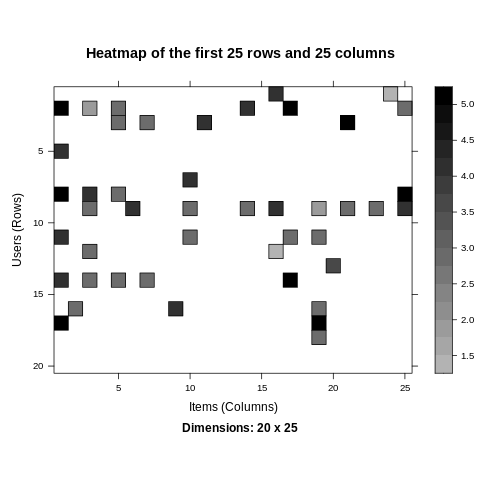

In [ ]:
%%R
image(ratingMatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 25 rows and 25 columns")

#***5. Performing Data Preparation***

In [ ]:
%%R
Performing Data Preparation
We will conduct data preparation in the following three steps –

Selecting useful data.
Normalizing data.
Binarizing the data.
For finding useful data in our dataset, we have set the threshold for the minimum number of users who have rated a film as 50. This is also same for minimum number of views that are per film. This way, we have filtered a list of watched films from least-watched ones.
movie_ratings <- ratingMatrix[rowCounts(ratingMatrix) > 50,
                             colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class ‘realRatingMatrix’ with 38341 ratings.


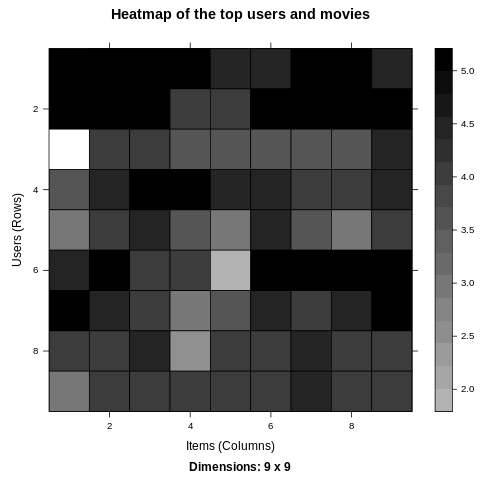

In [ ]:
%%R
minimum_movies<- quantile(rowCounts(movie_ratings), 0.98)
minimum_users <- quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies,
                     colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



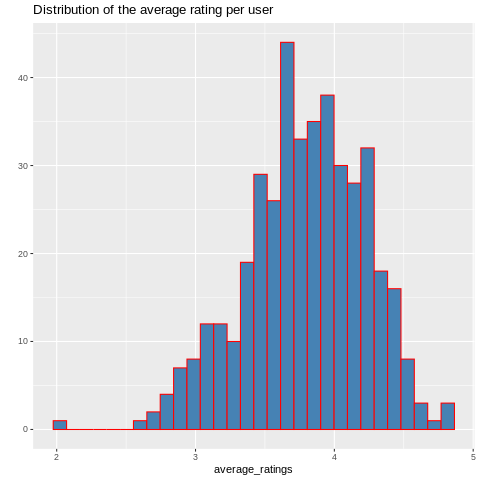

In [ ]:
%%R
average_ratings <- rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("red")) +
  ggtitle("Distribution of the average rating per user")

#**6. Data Normalization**

***Normalization is a data preparation procedure to standardize the numerical values in a column to a common scale value.***

In [ ]:
%%R
normalized_ratings <- normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)
image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
                          colCounts(normalized_ratings) > minimum_users], 
      main = "Normalized Ratings of the Top Users")

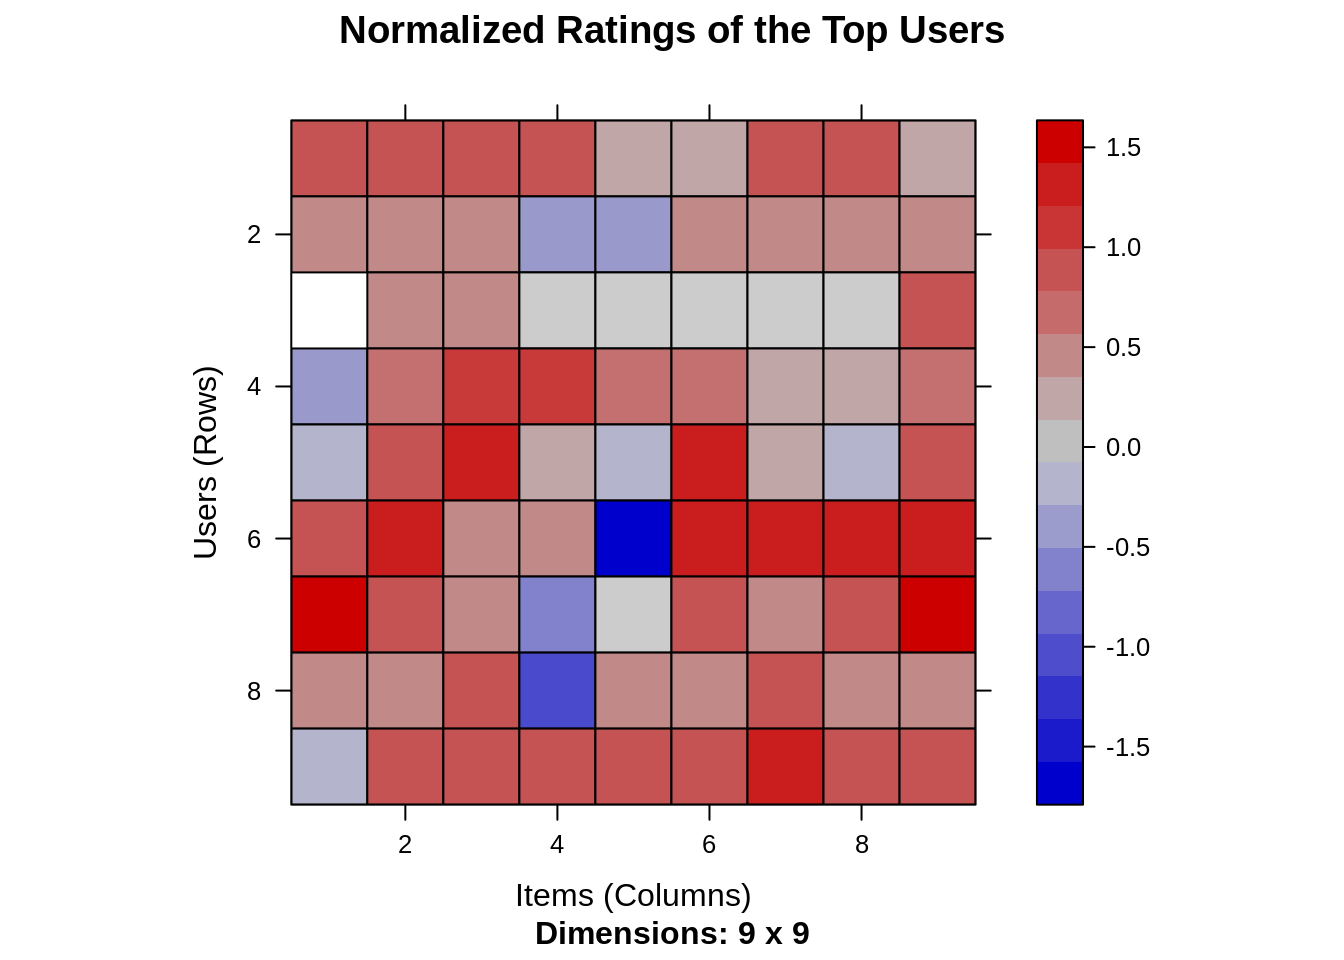

# **7. Performing** **Data** **Binarization**

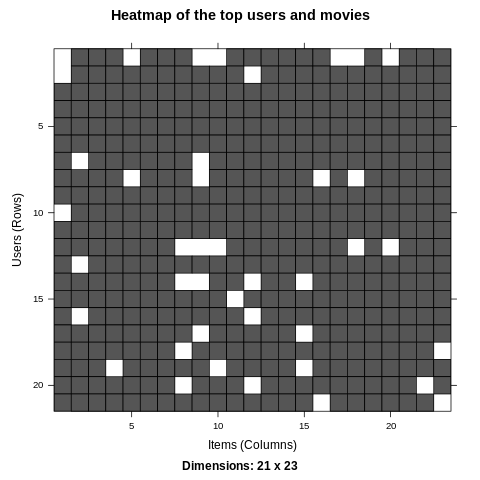

In [ ]:
%%R
binary_minimum_movies <- quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users <- quantile(colCounts(movie_ratings), 0.95)
#movies_watched <- binarize(movie_ratings, minRating = 1)
good_rated_films <- binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

#**8. Collaborative Filtering System**

In [ ]:
%%R
sampled_data<- sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data <- movie_ratings[sampled_data, ]
testing_data <- movie_ratings[!sampled_data, ]

### 9. Building the Recommendation System

In [ ]:
%%R
recommendation_system <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters


$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE



In [ ]:
%%R
recommen_model <- Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model
class(recommen_model)

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"


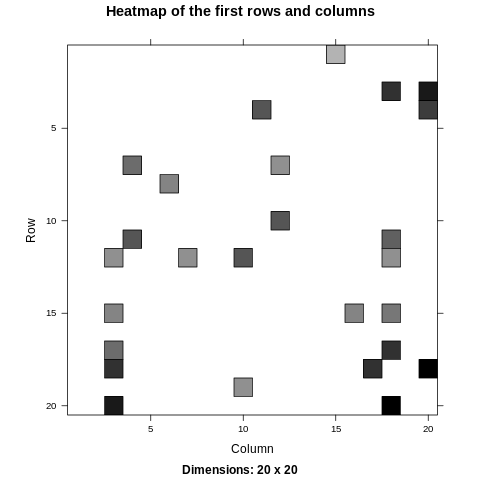

In [ ]:
%%R
model_info <- getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items <- 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



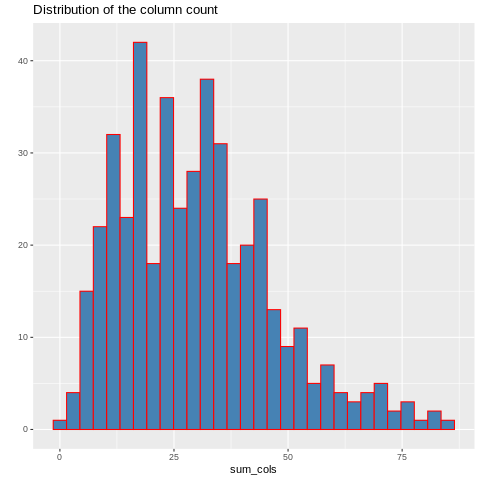

In [ ]:
%%R
sum_rows <- rowSums(model_info$sim > 0)
table(sum_rows)
sum_cols <- colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("red"))+ ggtitle("Distribution of the column count")

### 10. Recommender System On Dataset

In [ ]:
%%R
top_recommendations <- 10 # the number of items to recommend to each user
predicted_recommendations <- predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as ‘topNList’ with n = 10 for 91 users. 


In [ ]:
%%R
user1 <- predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <- movies_user1
for (index in 1:10){
  movies_user2[index] <- as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[index])$title)
}
movies_user2

 [1] "Heat (1995)"                      "Leaving Las Vegas (1995)"        
 [3] "Mr. Holland's Opus (1995)"        "Taxi Driver (1976)"              
 [5] "Philadelphia (1993)"              "Schindler's List (1993)"         
 [7] "Blade Runner (1982)"              "Dances with Wolves (1990)"       
 [9] "Silence of the Lambs, The (1991)" "North by Northwest (1959)"       


In [ ]:
%%R
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) # matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

      [,1]  [,2]  [,3] [,4]
 [1,]    6   594  2692   32
 [2,]   25  1704 44191  145
 [3,]   62 68358   527  293
 [4,]  111  1343  4306  858
 [5,]  508  2858  1625 1047
 [6,]  527  3147   318 1302
 [7,]  541   474  1259 1339
 [8,]  590  4973  3000 1876
 [9,]  593  2716   293 1961
[10,]  908    50  1276 2700


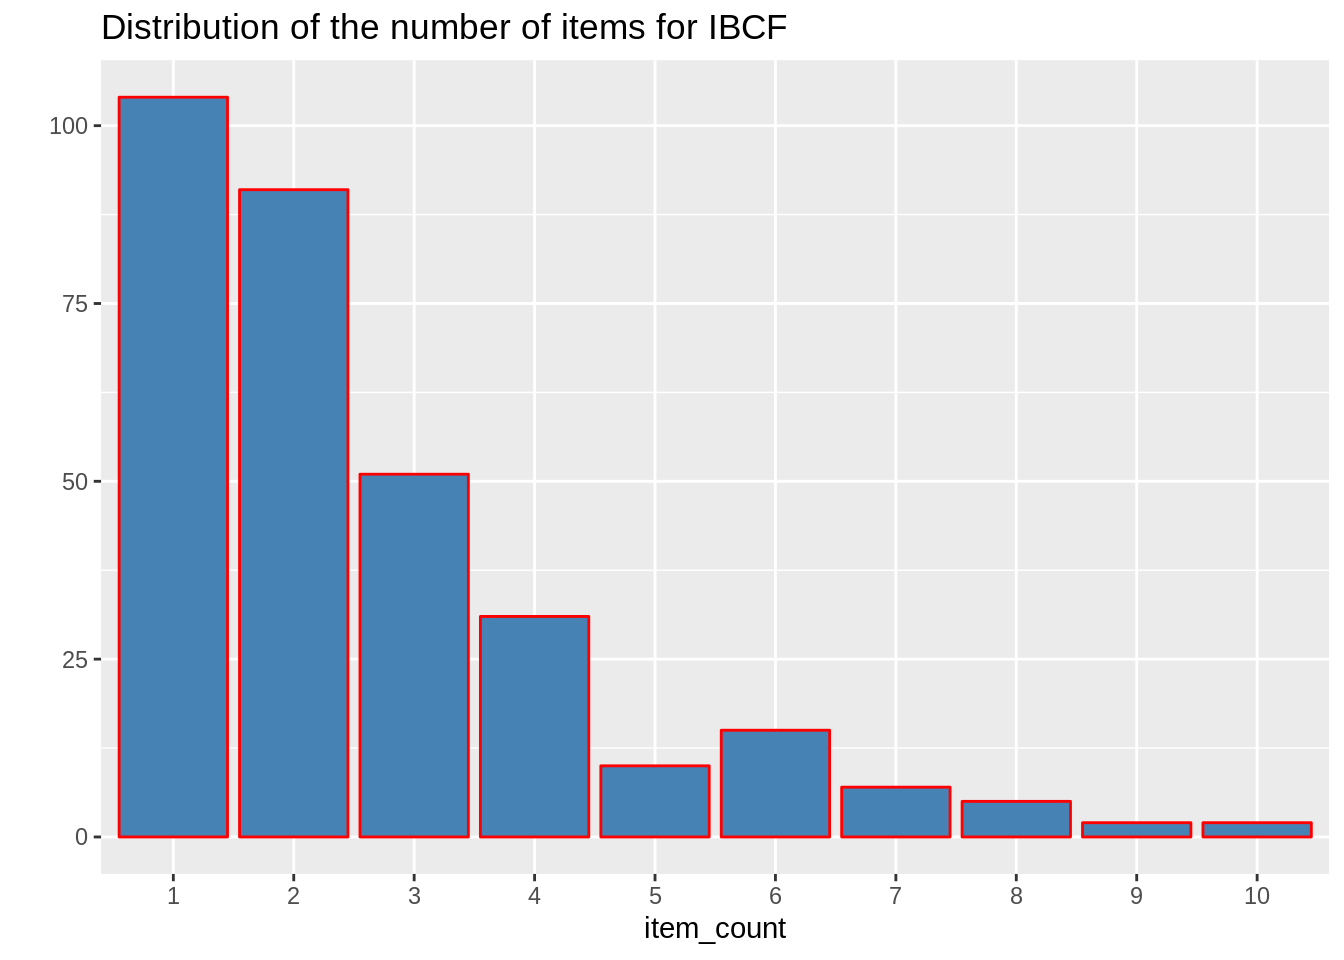

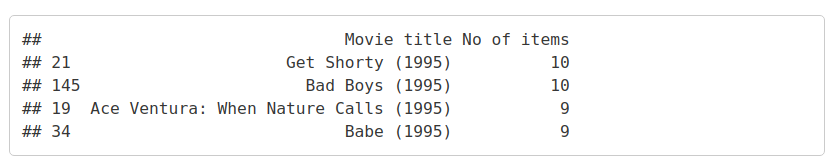